<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
# from datetime import timedelta
from google.colab import files
import matplotlib.pyplot as plt

!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

Nashville_housing_data_2013_2016.xlsx  sample_data


,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,2013-01-24,132000,20130128-0008725,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,20130118-0006337,No,...,134400.0,168300.0,1149.0,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,20130124-0008033,No,...,157800.0,191800.0,2090.0,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,20130128-0008863,No,...,243700.0,268700.0,2145.0,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,20130131-0009929,No,...,138100.0,164800.0,1969.0,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,NASHVILLE,2016-10-06,210000,20161007-0106599,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-25,338000,20161101-0115186,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-04,742000,20161010-0106889,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-26,320000,20161031-0114730,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,1802 STEWART PL,NASHVILLE,TN,0.17,32000.0,134400.0,168300.0,1149.0,PT BSMT,1941.0,BRICK,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,2761 ROSEDALE PL,NASHVILLE,TN,0.11,34000.0,157800.0,191800.0,2090.0,SLAB,2000.0,BRICK/FRAME,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,224 PEACHTREE ST,NASHVILLE,TN,0.17,25000.0,243700.0,268700.0,2145.0,FULL BSMT,1948.0,BRICK/FRAME,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,316 LUTIE ST,NASHVILLE,TN,0.34,25000.0,138100.0,164800.0,1969.0,CRAWL,1910.0,FRAME,2.0,1.0,0.0
5,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,93736,2626 FOSTER AVE,NASHVILLE,TN,0.17,25000.0,86100.0,113300.0,1037.0,CRAWL,1945.0,FRAME,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,2016-10-26,214000,5004 SUNSHINE DR,ANTIOCH,TN,0.27,25000.0,142400.0,167400.0,2421.0,SLAB,1996.0,BRICK/FRAME,3.0,3.0,0.0
56607,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,2016-10-28,236000,4964 HICKORY WOODS E,ANTIOCH,TN,0.23,25000.0,159300.0,184300.0,3117.0,SLAB,1995.0,BRICK/FRAME,3.0,3.0,0.0
56614,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,2016-10-28,466000,1625 5TH AVE N,NASHVILLE,TN,0.15,40000.0,204100.0,256000.0,1637.0,CRAWL,2004.0,FRAME,3.0,2.0,1.0
56615,SINGLE FAMILY,1614 5TH AVE N,NASHVILLE,2016-10-26,685000,1614 5TH AVE N,NASHVILLE,TN,0.19,40000.0,295900.0,351600.0,2478.0,CRAWL,2005.0,FRAME,4.0,3.0,1.0


In [4]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])

cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
50281,SINGLE FAMILY,4121 FRANKLIN PIKE,NASHVILLE,2016-06-07,2438500,4121 FRANKLIN PIKE,NASHVILLE,TN,8.12,849600.0,1541400.0,2467100.0,9235.00000,CRAWL,1970.0,BRICK,11.0,9.0,2.0
22405,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2014-10-20,1600000,2430 BEAR RD,NASHVILLE,TN,1.33,240000.0,1826100.0,2115400.0,15378.00000,PT BSMT,1948.0,BRICK,10.0,10.0,0.0
573,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2013-02-19,1700000,2430 BEAR RD,NASHVILLE,TN,1.33,240000.0,1826100.0,2115400.0,15378.00000,PT BSMT,1948.0,BRICK,10.0,10.0,0.0
35082,SINGLE FAMILY,1402 ORDWAY PL,NASHVILLE,2015-07-06,670000,1402 ORDWAY PL,NASHVILLE,TN,0.34,102000.0,507400.0,623700.0,3576.06995,PT BSMT,1925.0,BRICK,9.0,3.0,1.0
56239,QUADPLEX,404 CLEVELAND ST,NASHVILLE,2016-10-06,127500,404 CLEVELAND ST,NASHVILLE,TN,0.33,35100.0,125900.0,161000.0,3344.00000,CRAWL,1964.0,BRICK/FRAME,9.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17839,SINGLE FAMILY,3522 ELKINS AVE,NASHVILLE,2014-07-09,198139,3522 ELKINS AVE,NASHVILLE,TN,0.17,65000.0,109300.0,174300.0,1204.00000,CRAWL,1920.0,FRAME,1.0,1.0,0.0
9499,SINGLE FAMILY,2601 HERMAN ST,NASHVILLE,2013-11-20,60000,2601 HERMAN ST,NASHVILLE,TN,0.17,9000.0,17700.0,26700.0,644.00000,CRAWL,1920.0,FRAME,1.0,1.0,0.0
213,SINGLE FAMILY,1710 SCOVEL ST,NASHVILLE,2013-01-08,37500,1710 SCOVEL ST,NASHVILLE,TN,0.09,13000.0,45900.0,64500.0,1057.00000,CRAWL,1935.0,BRICK/FRAME,1.0,1.0,0.0
21500,SINGLE FAMILY,919 N 14TH ST,NASHVILLE,2014-09-02,330000,919 N 14TH ST,NASHVILLE,TN,0.34,66300.0,187400.0,253700.0,1882.50000,CRAWL,1940.0,FRAME,1.0,1.0,1.0


In [6]:
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
15862,SINGLE FAMILY,5709 ST CHARLES CT,HERMITAGE,2014-05-02,205000,5709 ST CHARLES CT,HERMITAGE,TN,0.04,27000.0,121800.0,148800.0,2046.00000,CRAWL,1984.0,BRICK,3.0,3.0,0.0
21941,SINGLE FAMILY,900 JACKSON ST,NASHVILLE,2014-09-12,289900,900 JACKSON ST,NASHVILLE,TN,0.04,20000.0,194500.0,214500.0,1379.00000,CRAWL,1910.0,FRAME,3.0,2.0,0.0
55050,SINGLE FAMILY,5709 ST CHARLES CT,HERMITAGE,2016-09-30,248000,5709 ST CHARLES CT,HERMITAGE,TN,0.04,27000.0,121800.0,148800.0,2046.00000,CRAWL,1984.0,BRICK,3.0,3.0,0.0
24351,SINGLE FAMILY,54 HUBBARD ST,NASHVILLE,2014-12-12,24900,54 HUBBARD ST,NASHVILLE,TN,0.05,10000.0,30800.0,40800.0,708.00000,CRAWL,1920.0,FRAME,2.0,1.0,0.0
24028,ZERO LOT LINE,717 JOSEPH AVE,NASHVILLE,2014-11-13,40000,717 JOSEPH AVE,NASHVILLE,TN,0.05,20000.0,27800.0,47800.0,1160.00000,CRAWL,1963.0,BRICK,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36565,SINGLE FAMILY,413 E PALESTINE AVE,MADISON,2015-08-03,250000,413 E PALESTINE AVE,MADISON,TN,5.11,87400.0,114800.0,202200.0,1404.00000,CRAWL,1940.0,FRAME,4.0,3.0,1.0
40676,SINGLE FAMILY,200 GREEN ACRES DR,GOODLETTSVILLE,2015-11-13,335000,200 GREEN ACRES DR,GOODLETTSVILLE,TN,5.14,77100.0,167500.0,256900.0,3343.20001,FULL BSMT,1964.0,BRICK,4.0,3.0,0.0
56326,SINGLE FAMILY,477 GENERAL KERSHAW DR,OLD HICKORY,2016-10-26,450000,477 GENERAL KERSHAW DR,OLD HICKORY,TN,5.16,81600.0,141800.0,286900.0,2537.00000,PT BSMT,1993.0,BRICK,4.0,3.0,1.0
32875,SINGLE FAMILY,1280 OLD HICKORY BLVD,BRENTWOOD,2015-06-29,945000,1280 OLD HICKORY BLVD,BRENTWOOD,TN,5.17,568600.0,202200.0,772000.0,4222.00000,CRAWL,1899.0,LOG,5.0,4.0,0.0


In [8]:
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
6983,SINGLE FAMILY,4013 MEADOW RD,NASHVILLE,2013-08-16,10000,4013 MEADOW RD,NASHVILLE,TN,0.52,20000.0,20200.0,40200.0,450,CRAWL,1951.0,FRAME,1.0,1.0,0.0
39536,SINGLE FAMILY,138 LUCILE ST,NASHVILLE,2015-10-14,60000,138 LUCILE ST,NASHVILLE,TN,0.17,15000.0,2300.0,17300.0,463,CRAWL,1946.0,FRAME,1.0,1.0,0.0
9830,SINGLE FAMILY,206 ELM ST,MADISON,2013-11-04,20500,206 ELM ST,MADISON,TN,0.08,8000.0,18400.0,28600.0,504,CRAWL,1935.0,FRAME,1.0,1.0,0.0
40752,SINGLE FAMILY,1802 MERIDIAN ST,NASHVILLE,2015-11-02,100000,1802 MERIDIAN ST,NASHVILLE,TN,0.25,15000.0,29700.0,44700.0,520,CRAWL,1940.0,FRAME,2.0,1.0,0.0
36611,SINGLE FAMILY,321 DUKE ST,NASHVILLE,2015-08-12,35000,321 DUKE ST,NASHVILLE,TN,0.16,10000.0,13500.0,23500.0,528,CRAWL,1948.0,FRAME,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42046,SINGLE FAMILY,1205 N 7TH ST,NASHVILLE,2015-12-17,378000,1205 N 7TH ST,NASHVILLE,TN,0.12,27000.0,334400.0,371500.0,2592,CRAWL,2015.0,FRAME,4.0,2.0,1.0
15348,SINGLE FAMILY,6315 E VALLEY RD,NASHVILLE,2014-05-19,657500,6315 E VALLEY RD,NASHVILLE,TN,3.57,312500.0,204000.0,569300.0,2592,CRAWL,1960.0,BRICK,3.0,3.0,0.0
31404,DUPLEX,1005 MERIDIAN ST,NASHVILLE,2015-05-22,150000,1005 MERIDIAN ST,NASHVILLE,TN,0.15,27000.0,79600.0,106600.0,2592,CRAWL,1924.0,BRICK,4.0,2.0,0.0
3497,SINGLE FAMILY,3003 LAKESHORE DR,OLD HICKORY,2013-05-30,400000,3003 LAKESHORE DR,OLD HICKORY,TN,0.63,249000.0,158900.0,409100.0,2592,FULL BSMT,1958.0,BRICK,3.0,3.0,0.0


In [10]:
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[8500:])
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
8894,SINGLE FAMILY,2415 STIVERS ST,NASHVILLE,2013-10-15,100,2415 STIVERS ST,NASHVILLE,TN,0.39,16200.0,39300.0,57100.0,1134,CRAWL,1920.0,FRAME,2.0,1.0,0.0
245,SINGLE FAMILY,4021 DUMBARTON DR,NASHVILLE,2013-01-04,100,4021 DUMBARTON DR,NASHVILLE,TN,0.78,25000.0,94300.0,119300.0,1620,FULL BSMT,1958.0,BRICK,2.0,1.0,0.0
54859,SINGLE FAMILY,1228 LILLIAN ST,NASHVILLE,2016-09-09,800,1228 LILLIAN ST,NASHVILLE,TN,0.16,85000.0,160700.0,252400.0,1544,FULL BSMT,1948.0,FRAME,3.0,2.0,0.0
17359,SINGLE FAMILY,108 BLUE MIST CT,NASHVILLE,2014-06-27,1000,108 BLUE MIST CT,NASHVILLE,TN,0.48,27000.0,139900.0,166900.0,1911,CRAWL,1968.0,BRICK,3.0,2.0,0.0
8845,SINGLE FAMILY,46 TWIN ST,NASHVILLE,2013-10-11,3000,46 TWIN ST,NASHVILLE,TN,0.11,16200.0,145100.0,161300.0,1412,CRAWL,2014.0,FRAME,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47572,SINGLE FAMILY,3215 ANDERSON RD,ANTIOCH,2016-04-25,149000,3215 ANDERSON RD,ANTIOCH,TN,0.30,27500.0,82000.0,109500.0,1924,CRAWL,1979.0,FRAME,3.0,1.0,1.0
55242,SINGLE FAMILY,205 PIN OAK CT,ANTIOCH,2016-09-08,149000,205 PIN OAK CT,ANTIOCH,TN,0.23,20500.0,74700.0,95200.0,1161,CRAWL,1999.0,FRAME,3.0,2.0,0.0
38133,SINGLE FAMILY,1025 NEW PROVIDENCE PASS,MADISON,2015-09-02,149000,1025 NEW PROVIDENCE PASS,MADISON,TN,0.25,27000.0,96100.0,123100.0,1204,CRAWL,2009.0,BRICK/FRAME,3.0,2.0,0.0
14522,SINGLE FAMILY,1414 JANIE AVE,NASHVILLE,2014-04-11,149000,1414 JANIE AVE,NASHVILLE,TN,0.40,40000.0,98900.0,138900.0,974,CRAWL,1950.0,FRAME,2.0,1.0,0.0


In [12]:
cdf = cdf.sort_values(by='Full Bath', ascending=False)
cdf = cdf.drop(cdf.index[8497:])
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
7555,DUPLEX,137 COLEMONT DR,ANTIOCH,2013-09-27,105000,137 COLEMONT DR,ANTIOCH,TN,0.32,24000.0,104500.0,128500.0,2448,CRAWL,1981.0,BRICK/FRAME,4.0,6.0,0.0
17619,DUPLEX,4009 SHUFELD CT,ANTIOCH,2014-07-15,141433,4009 SHUFELD CT,ANTIOCH,TN,0.28,24000.0,104200.0,128200.0,2448,CRAWL,1981.0,BRICK/FRAME,4.0,6.0,0.0
10234,DUPLEX,205 CHILTON ST,NASHVILLE,2013-12-02,140000,205 CHILTON ST,NASHVILLE,TN,0.27,26000.0,114500.0,140500.0,2188,CRAWL,1997.0,FRAME,4.0,4.0,0.0
36366,DUPLEX,1414 23RD AVE N,NASHVILLE,2015-08-31,121500,1414 23RD AVE N,NASHVILLE,TN,0.17,13000.0,79300.0,92300.0,2277,SLAB,1988.0,BRICK,6.0,4.0,0.0
41298,DUPLEX,909 BOLSTER CT,NASHVILLE,2015-12-23,148500,909 BOLSTER CT,NASHVILLE,TN,0.71,21500.0,89100.0,110600.0,2059,CRAWL,1983.0,FRAME/STONE,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,SINGLE FAMILY,300 PANAMINT DR,ANTIOCH,2014-03-17,135700,300 PANAMINT DR,ANTIOCH,TN,0.19,15000.0,94500.0,109500.0,2080,FULL BSMT,1978.0,FRAME,4.0,1.0,1.0
16202,SINGLE FAMILY,508 CEDARCREEK CIR,NASHVILLE,2014-06-12,135500,508 CEDARCREEK CIR,NASHVILLE,TN,0.27,25000.0,97700.0,122700.0,1608,SLAB,1976.0,BRICK/FRAME,3.0,1.0,0.0
5998,SINGLE FAMILY,1009 SHELBY AVE,NASHVILLE,2013-07-11,135750,1009 SHELBY AVE,NASHVILLE,TN,0.14,85000.0,77400.0,162400.0,1058,CRAWL,1950.0,BRICK,3.0,1.0,0.0
43414,SINGLE FAMILY,3519 MCGAVOCK PIKE,NASHVILLE,2016-01-29,135800,3519 MCGAVOCK PIKE,NASHVILLE,TN,1.02,23000.0,83500.0,113000.0,1280,CRAWL,1955.0,BRICK,2.0,1.0,0.0


In [13]:
cdf['Full Bath'].unique()

array([6., 4., 3., 2., 1.])

In [14]:
cdf['Land_Use'] = cdf['Land Use']
cdf['Foundation_Type'] = cdf['Foundation Type']
cdf['Exterior_Wall'] = cdf['Exterior Wall']

cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']
cdf = cdf[cdf.Land_Use != 'QUADPLEX']

cdf = cdf[cdf.Foundation_Type != 'PIERS']

cdf = cdf[cdf.Exterior_Wall != 'FRAME']
cdf = cdf[cdf.Exterior_Wall != 'CONC BLK']
cdf = cdf[cdf.Exterior_Wall != 'LOG']
cdf = cdf[cdf.Exterior_Wall != 'METAL']

cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,...,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Land_Use,Foundation_Type,Exterior_Wall
7555,DUPLEX,137 COLEMONT DR,ANTIOCH,2013-09-27,105000,137 COLEMONT DR,ANTIOCH,TN,0.32,24000.0,...,2448,CRAWL,1981.0,BRICK/FRAME,4.0,6.0,0.0,DUPLEX,CRAWL,BRICK/FRAME
17619,DUPLEX,4009 SHUFELD CT,ANTIOCH,2014-07-15,141433,4009 SHUFELD CT,ANTIOCH,TN,0.28,24000.0,...,2448,CRAWL,1981.0,BRICK/FRAME,4.0,6.0,0.0,DUPLEX,CRAWL,BRICK/FRAME
36366,DUPLEX,1414 23RD AVE N,NASHVILLE,2015-08-31,121500,1414 23RD AVE N,NASHVILLE,TN,0.17,13000.0,...,2277,SLAB,1988.0,BRICK,6.0,4.0,0.0,DUPLEX,SLAB,BRICK
41298,DUPLEX,909 BOLSTER CT,NASHVILLE,2015-12-23,148500,909 BOLSTER CT,NASHVILLE,TN,0.71,21500.0,...,2059,CRAWL,1983.0,FRAME/STONE,4.0,4.0,0.0,DUPLEX,CRAWL,FRAME/STONE
45647,DUPLEX,727 LINDEN GRN,HERMITAGE,2016-03-21,119900,727 LINDEN GRN,HERMITAGE,TN,0.36,21000.0,...,1920,FULL BSMT,1979.0,BRICK/FRAME,4.0,4.0,0.0,DUPLEX,FULL BSMT,BRICK/FRAME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,SINGLE FAMILY,504 ACHIEVEMENT DR,NASHVILLE,2013-07-01,135500,504 ACHIEVEMENT DR,NASHVILLE,TN,0.22,31000.0,...,1419,CRAWL,1960.0,BRICK,3.0,1.0,1.0,SINGLE FAMILY,CRAWL,BRICK
663,SINGLE FAMILY,3018 HUMMINGBIRD DR,NASHVILLE,2013-02-13,46000,3018 HUMMINGBIRD DR,NASHVILLE,TN,0.71,18900.0,...,1150,CRAWL,1958.0,BRICK,3.0,1.0,0.0,SINGLE FAMILY,CRAWL,BRICK
16202,SINGLE FAMILY,508 CEDARCREEK CIR,NASHVILLE,2014-06-12,135500,508 CEDARCREEK CIR,NASHVILLE,TN,0.27,25000.0,...,1608,SLAB,1976.0,BRICK/FRAME,3.0,1.0,0.0,SINGLE FAMILY,SLAB,BRICK/FRAME
5998,SINGLE FAMILY,1009 SHELBY AVE,NASHVILLE,2013-07-11,135750,1009 SHELBY AVE,NASHVILLE,TN,0.14,85000.0,...,1058,CRAWL,1950.0,BRICK,3.0,1.0,0.0,SINGLE FAMILY,CRAWL,BRICK


In [ ]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
cdf.dtypes

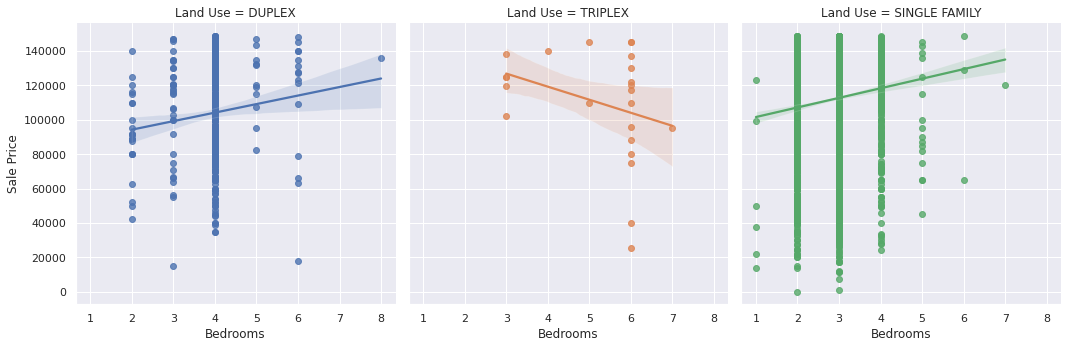

In [16]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col='Land Use', hue='Land Use')

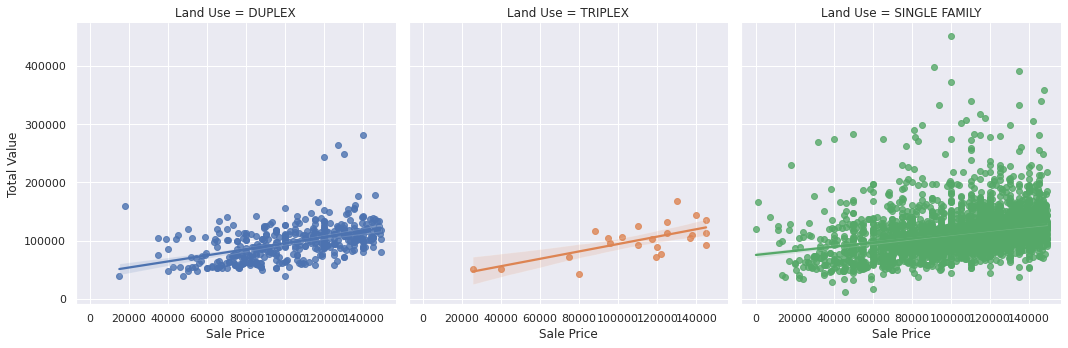

In [22]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', col='Land Use',  hue='Land Use')

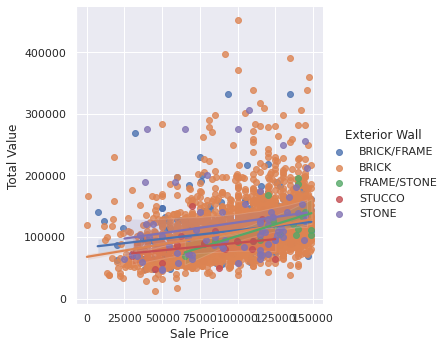

In [23]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', hue='Exterior Wall')

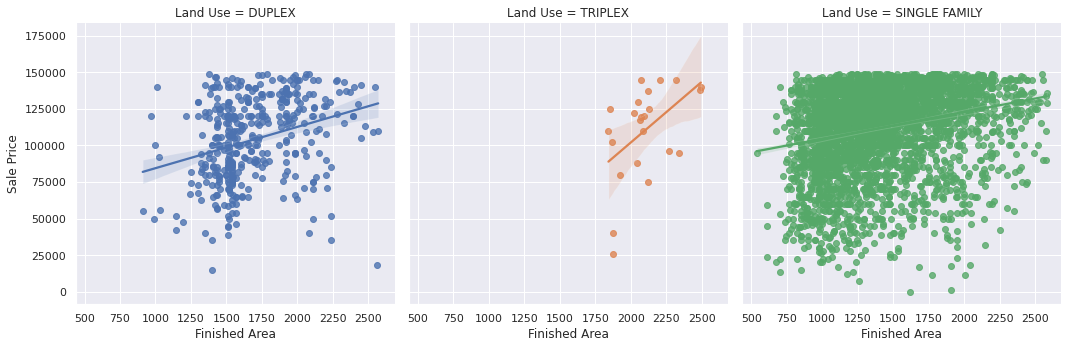

In [24]:
sns.lmplot(data = cdf, x='Finished Area', y='Sale Price', col='Land Use',  hue='Land Use')

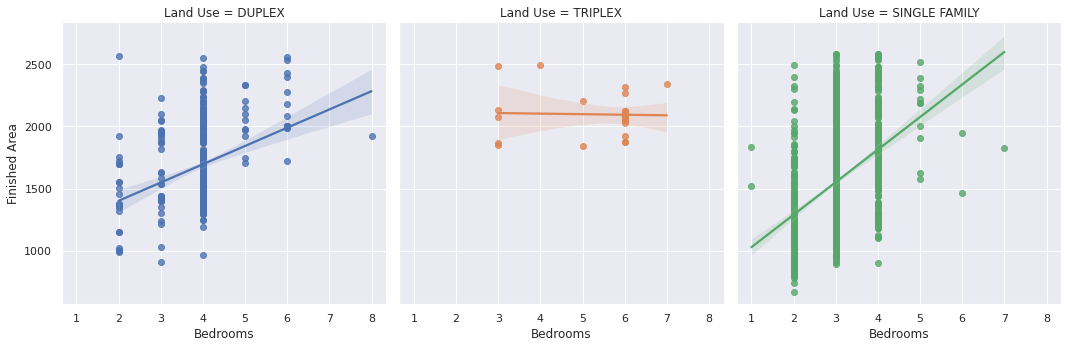

In [17]:
sns.lmplot(data = cdf, y='Finished Area', x='Bedrooms',  col='Land Use', hue='Land Use')

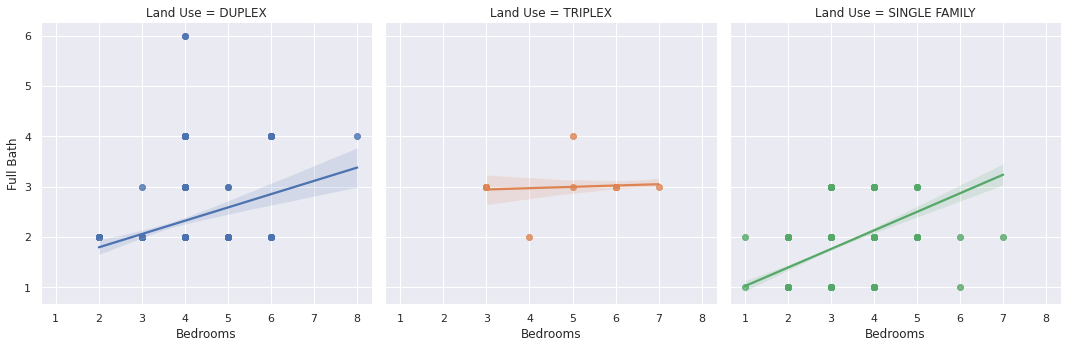

In [18]:
sns.lmplot(data = cdf, y='Full Bath', x='Bedrooms', col='Land Use', hue='Land Use')

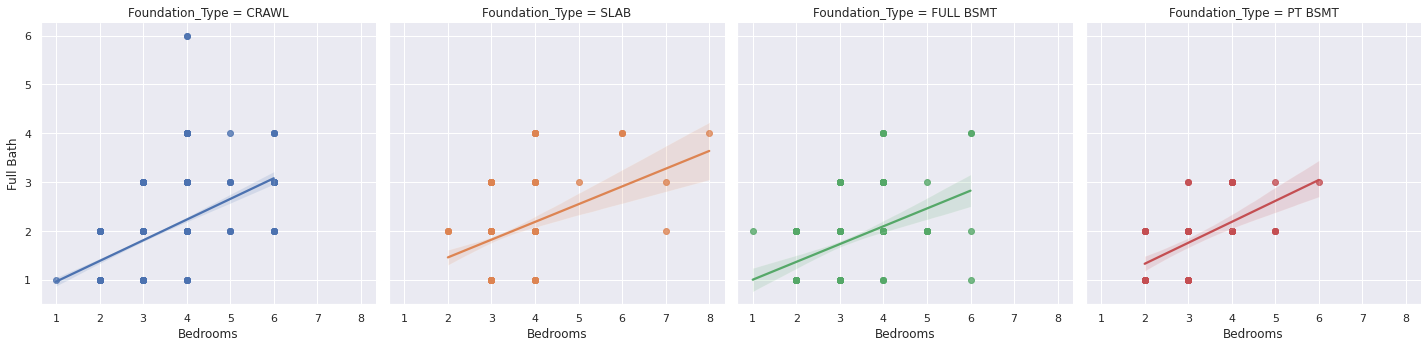

In [19]:
sns.lmplot(data = cdf, y='Full Bath', x='Bedrooms', col='Foundation_Type', hue='Foundation_Type')

In [54]:
cdf['Avg_Price_By_Bedrooms'] = cdf.groupby('Bedrooms')['Sale Price'].transform('mean')
cdf['Avg_Price_By_Bedrooms'] = cdf['Avg_Price_By_Bedrooms'].astype(int)
cdf['Avg_Value_By_Bedrooms'] = cdf.groupby('Bedrooms')['Total Value'].transform('mean')
cdf['Avg_Value_By_Bedrooms'] = cdf['Avg_Value_By_Bedrooms'].astype(int)

# one_bed_cdf = cdf[cdf.Bedrooms == 1]
# one_bed_cdf
# two_bed_cdf = cdf[cdf.Bedrooms == 2]
# two_bed_cdf
# three_bed_cdf = cdf[cdf.Bedrooms == 3]
# three_bed_cdf
# four_bed_cdf = cdf[cdf.Bedrooms == 4]
# four_bed_cdf
# five_bed_cdf = cdf[cdf.Bedrooms == 5]
# five_bed_cdf
# six_bed_cdf = cdf[cdf.Bedrooms == 6]
# six_bed_cdf
# seven_bed_cdf = cdf[cdf.Bedrooms == 7]
# seven_bed_cdf
# eight_bed_cdf = cdf[cdf.Bedrooms == 8]
# eight_bed_cdf
# nine_bed_cdf = cdf[cdf.Bedrooms == 9]
# nine_bed_cdf
# ten_bed_cdf = cdf[cdf.Bedrooms == 10]
# ten_bed_cdf
# eleven_bed_cdf = cdf[cdf.Bedrooms == 11]
# eleven_bed_cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,...,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Land_Use,Foundation_Type,Exterior_Wall,Avg_Price_By_Bedrooms,Avg_Value_By_Bedrooms
15142,TRIPLEX,2405 MEHARRY BLVD,NASHVILLE,2014-05-08,95000,2405 MEHARRY BLVD,NASHVILLE,TN,0.17,11000.0,...,1945.0,BRICK,7.0,3.0,0.0,TRIPLEX,SLAB,BRICK,107500,117000
12,SINGLE FAMILY,3801 ECKHART DR,NASHVILLE,2013-01-04,120000,3801 ECKHART DR,NASHVILLE,TN,0.29,21500.0,...,1978.0,BRICK,7.0,2.0,0.0,SINGLE FAMILY,SLAB,BRICK,107500,117000


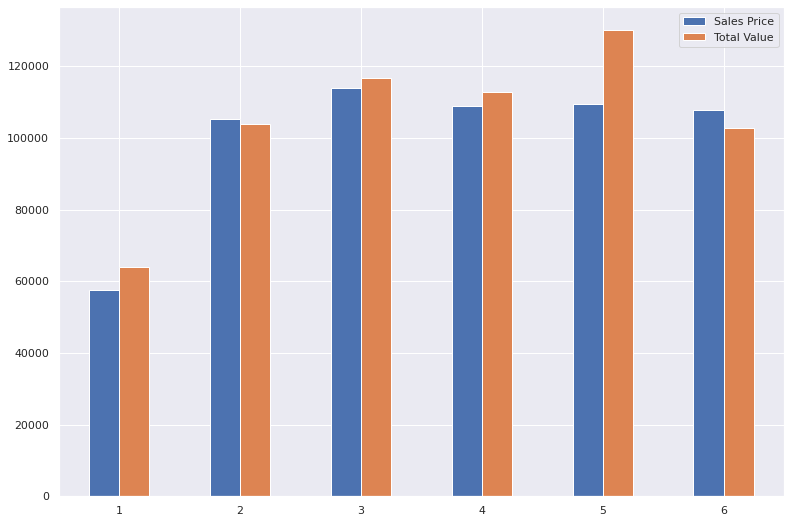

In [56]:
sales_price_avg = [57555, 105212, 113885, 108892, 109511, 107732]
 
total_value_avg = [63933, 103805, 116825, 112962, 130037, 102850]
 
index = ['1', '2', '3', '4', '5', '6']
 
tdf = pd.DataFrame({'Sales Price': sales_price_avg,
 
                   'Total Value': total_value_avg}, index=index)
 
ax = tdf.plot.bar(rot=0)